# Optional Autocorrect application

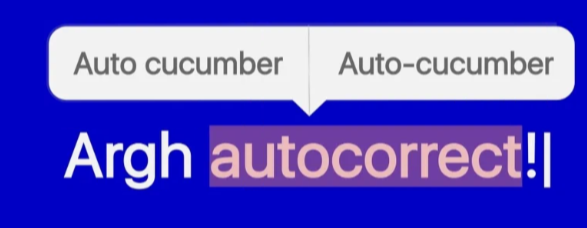

## Autocorrect

**Application that changes misspelled words to the correct ones.**

1. Indentify a misspelled word
2. Find strings `n` edit distance away
3. Filter candidates
4. Calculate word probabilities

### Building the model

1. You know misspelled words by looking into a dictionary.
2. Edit Distance takes into consideration 3 operations:
   - Insert (add a letter)
   - Delete (remove a letter)
   - Switch (swap two neighbor letters)
   - Replace (replacing a letter)
3. Filter candidates looking into the dictionary

### Building the model II

1. Calculate the word probabilities

\[
P(w) = \frac{C(w)}{V}
\]


#  Minimum Edit distance

How do we evaluate the similarity between two strings? For example: 'waht' and 'what'

Also how do we efficiently find the shortest path to go from the word, 'waht' to the word 'what'?

we will implement a dynamic programming system that will tell we the minimum number of edits required to convert a string into another string.

<a name='4-1'></a>
### Part 4.1 Dynamic Programming

Dynamic Programming breaks a problem down into subproblems which can be combined to form the final solution. Here, given a string source[0..i] and a string target[0..j], we will compute all the combinations of substrings[i, j] and calculate their edit distance. To do this efficiently, we will use a table to maintain the previously computed substrings and use those to calculate larger substrings.

we have to create a matrix and update each element in the matrix as follows:  


$$\text{Per Cell Operations}$$
\begin{align}
 \\
D[i,j] =min
\begin{cases}
D[i-1,j] + del\_cost\\
D[i,j-1] + ins\_cost\\
D[i-1,j-1] + \left\{\begin{matrix}
rep\_cost; & if src[i]\neq tar[j]\\
0 ; & if src[i]=tar[j]
\end{matrix}\right.
\end{cases}
\tag{5}
\end{align}

So converting the source word **play** to the target word **stay**, using an input cost of one, a delete cost of 1, and replace cost of 2 would give you the following table:
<table style="width:20%">

  <tr>
    <td> <b> </b>  </td>
    <td> <b># </b>  </td>
    <td> <b>s </b>  </td>
    <td> <b>t </b> </td> 
    <td> <b>a </b> </td> 
    <td> <b>y </b> </td> 
  </tr>
   <tr>
    <td> <b>  #  </b></td>
    <td> 0</td> 
    <td> 1</td> 
    <td> 2</td> 
    <td> 3</td> 
    <td> 4</td> 
 
  </tr>
  <tr>
    <td> <b>  p  </b></td>
    <td> 1</td> 
 <td> 2</td> 
    <td> 3</td> 
    <td> 4</td> 
   <td> 5</td>
  </tr>
   
  <tr>
    <td> <b> l </b></td>
    <td>2</td> 
    <td>3</td> 
    <td>4</td> 
    <td>5</td> 
    <td>6</td>
  </tr>

  <tr>
    <td> <b> a </b></td>
    <td>3</td> 
     <td>4</td> 
     <td>5</td> 
     <td>4</td>
     <td>5</td> 
  </tr>
  
   <tr>
    <td> <b> y </b></td>
    <td>4</td> 
      <td>5</td> 
     <td>6</td> 
     <td>5</td>
     <td>4</td> 
  </tr>
  

</table>



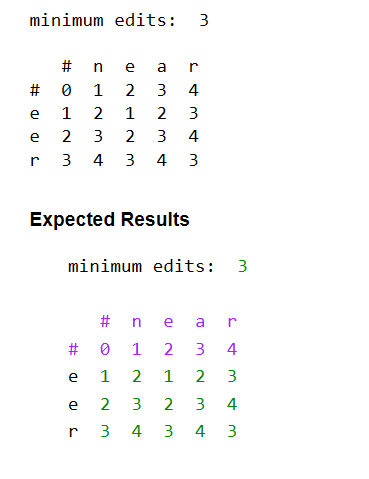

Above are some examples of cells where replacement is used. This also shows the minimum path from the lower right final position where "EER" has been replaced by "NEAR" back to the start. This provides a starting point for the optional 'backtrace' algorithm below.

In [19]:
import re
from collections import Counter

# Load a dictionary or a text corpus
def load_words():
    with open('raw.txt', 'r') as file:
        words = file.read().split()
    return words

# Calculate word frequencies
def calculate_word_probabilities(word_list):
    word_counts = Counter(word_list)
    total_words = sum(word_counts.values())
    word_probs = {word: count / total_words for word, count in word_counts.items()}
    return word_probs

# Edit Distance: Find strings 1 edit distance away
def edits1(word):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [L + R[1:] for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R) > 1]
    replaces = [L + c + R[1:] for L, R in splits if R for c in letters]
    inserts = [L + c + R for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

# Filter candidates by checking against a dictionary
def filter_candidates(word, word_probs):
    return set(w for w in edits1(word) if w in word_probs)

# Find the best candidate based on word probabilities
def best_candidate(word, word_probs):
    candidates = filter_candidates(word, word_probs)
    if candidates:
        return max(candidates, key=word_probs.get)
    return word

# Main autocorrect function
def autocorrect(word, word_probs):
    if word in word_probs:
        return word
    return best_candidate(word, word_probs)

# Example usage
if __name__ == "__main__":
    word_list = load_words()
    word_probs = calculate_word_probabilities(word_list)

    # Example words
    words_to_correct = ["runing", "quiclkly", "shoutng", "happly"]

    corrected_words = [autocorrect(word, word_probs) for word in words_to_correct]
    print(corrected_words)


['running', 'quickly', 'shouting', 'happily']


### Now lets implement Levenshtein function to ease our tasks of finding words 1 or 2 edit distance away.

In [20]:
pip install python-Levenshtein


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import tkinter as tk
from tkinter import messagebox
import Levenshtein
from collections import Counter

# Corpus input
def load_words():
    with open('raw.txt', 'r') as file:
        words = file.read().split()
    return words

# Calculate word frequencies
def calc_word_prob(word_list):
    word_counts = Counter(word_list)
    total_words = sum(word_counts.values())
    word_probs = {word: count / total_words for word, count in word_counts.items()}
    return word_probs

# Generate candidates with Levenshtein distance of 1 or 2
def gen_cand(word, word_probs):
    candidates = set()
    for w in word_probs:
        if Levenshtein.distance(word, w) <= 2:
            candidates.add(w)
    return candidates

# Find the best candidate based on word probabilities
def best_ca(word, word_probs):
    candidates = gen_cand(word, word_probs)
    if candidates:
        return max(candidates, key=word_probs.get)
    return word

# Main autocorrect function
def autocorrect(word, word_probs):
    if word in word_probs:
        return word
    return best_ca(word, word_probs)

# Tkinter application
class AutocorrectApp:
    def __init__(self, root, word_probs):
        self.root = root
        self.word_probs = word_probs
        self.root.title("Autocorrect Application")

        # Input label
        self.label = tk.Label(root, text="Enter a word:")
        self.label.pack(pady=10)

        # Input entry
        self.entry = tk.Entry(root, width=30)
        self.entry.pack(pady=10)

        # Correct button
        self.correct_button = tk.Button(root, text="Correct Word", command=self.correct_word)
        self.correct_button.pack(pady=10)

        # Result label
        self.result_label = tk.Label(root, text="", fg="blue")
        self.result_label.pack(pady=10)

    def correct_word(self):
        input_word = self.entry.get()
        corrected_word = autocorrect(input_word, self.word_probs)
        self.result_label.config(text=f"Corrected word: {corrected_word}")

# Main function
if __name__ == "__main__":
    word_list = load_words()
    word_probs = calc_word_prob(word_list)

    root = tk.Tk()
    app = AutocorrectApp(root, word_probs)
    root.mainloop()
